In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import jarque_bera
from scipy.stats import normaltest
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


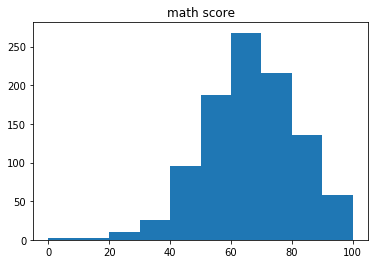

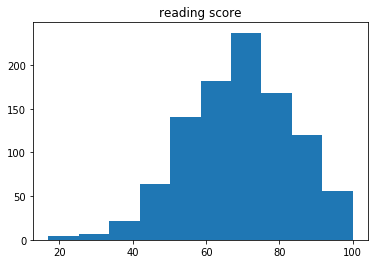

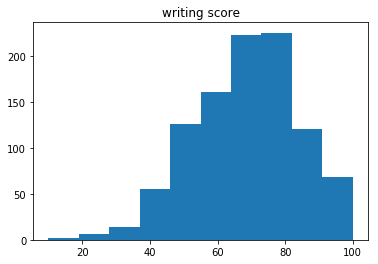

In [5]:
#soru1
#sınav sonuclarının dagılımına bakıyoruz.
for i in ['math score','reading score','writing score']:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

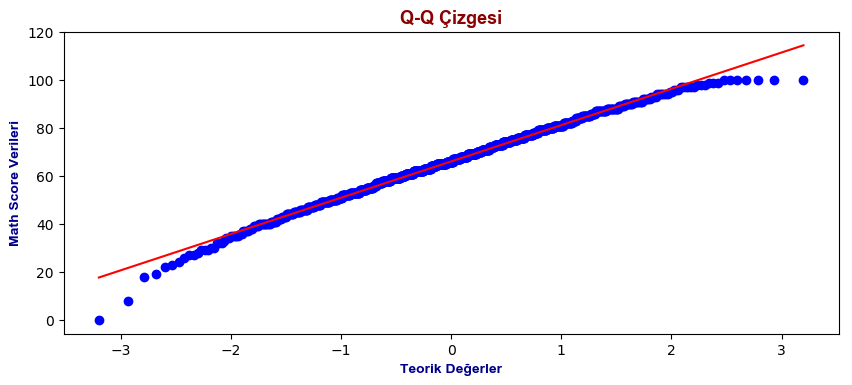

In [6]:
plt.figure(figsize=(10,4), dpi = 100)
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
nsample = 1000
res = stats.probplot(df['math score'], plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel("Math Score Verileri", fontdict = eksen_font)
plt.show()

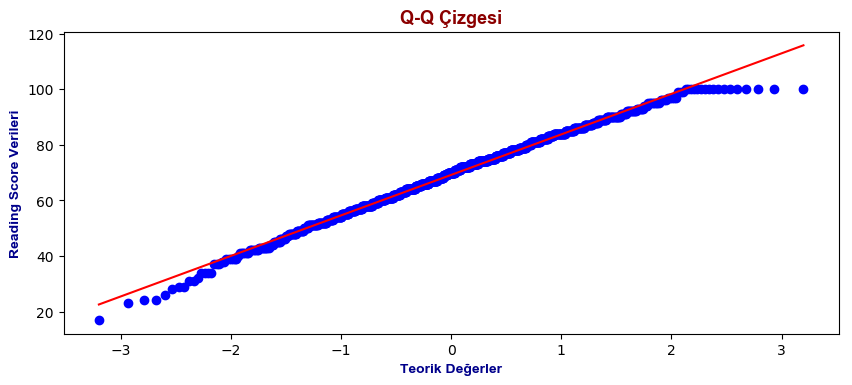

In [7]:
plt.figure(figsize=(10,4), dpi = 100)
nsample = 1000
res = stats.probplot(df['reading score'], plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel("Reading Score Verileri", fontdict = eksen_font)
plt.show()

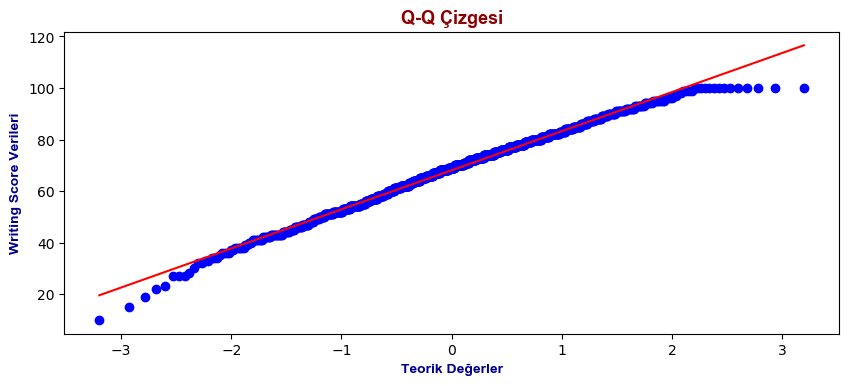

In [8]:
plt.figure(figsize=(10,4), dpi = 100)
nsample = 1000
res = stats.probplot(df['writing score'], plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel("Writing Score Verileri", fontdict = eksen_font)
plt.show()

In [ ]:
#üsttekiler yorumlanacak

In [9]:
x=df['math score']
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))
print('jarque_beratest teststat = %6.3f pvalue = %6.4f' % stats.jarque_bera(x))

normaltest teststat = 15.409 pvalue = 0.0005
jarque_beratest teststat = 15.912 pvalue = 0.0004


In [10]:
x=df['reading score']
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))
print('jarque_beratest teststat = %6.3f pvalue = %6.4f' % stats.jarque_bera(x))

normaltest teststat = 11.117 pvalue = 0.0039
jarque_beratest teststat = 11.383 pvalue = 0.0034


In [11]:
x=df['writing score']
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))
print('jarque_beratest teststat = %6.3f pvalue = %6.4f' % stats.jarque_bera(x))

normaltest teststat = 13.606 pvalue = 0.0011
jarque_beratest teststat = 13.985 pvalue = 0.0009


In [ ]:
#test sonucalrını yorumla.

In [12]:
#soru2
#3 dersin ortalamasından hedef degiskeni olusturduk.
df['hedef']=(df['math score']+df['reading score']+df['writing score'])/3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,hedef
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


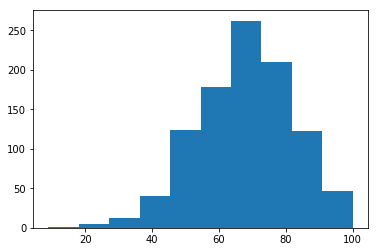

In [14]:
plt.hist(df['hedef'])
plt.show()


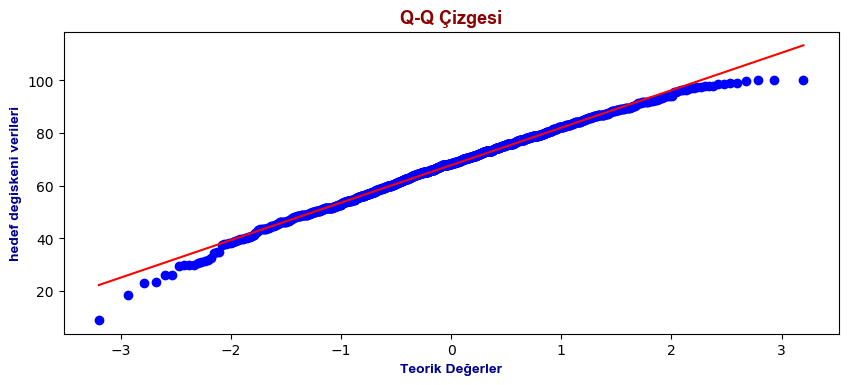

In [15]:
plt.figure(figsize=(10,4), dpi = 100)
nsample = 1000
res = stats.probplot(df['hedef'], plot=plt)
plt.title("Q-Q Çizgesi", fontdict = baslik_font)
plt.xlabel("Teorik Değerler", fontdict = eksen_font)
plt.ylabel("hedef degiskeni verileri", fontdict = eksen_font)
plt.show()

In [16]:
#burada skewness ve kurtosis testi kullanmak için yazdım.
x=df['hedef']
print('normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(x))
print('normal kurtosistest teststat = %6.3f pvalue = %6.4f' % stats.kurtosistest(x))
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(x))#this combine both of skewness and kurtosis
print('jarque_beratest teststat = %6.3f pvalue = %6.4f' % stats.jarque_bera(x))


normal skewtest teststat = -3.803 pvalue = 0.0001
normal kurtosistest teststat =  0.849 pvalue = 0.3958
normaltest teststat = 15.187 pvalue = 0.0005
jarque_beratest teststat = 15.453 pvalue = 0.0004


Test sonuçlarını yorumlayalım.

In [17]:
#soru3
df.corr()

,math score,reading score,writing score,hedef
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
hedef,0.918746,0.970331,0.965667,1.000000


Korelasyon tablosu sadece sürekli değişkenlerin ilişkisini veriyor.
Burada hedef değişkeninin diğer üç ders ile korelasyonu çok yüksek 
ama bu zaten beklenen birşey çünkü zaten değişkeni bu üç dersin ortalaması diye tanımlamıştık.Şimdi de diğer kategorik değişkenlerde bir farklılık gözleniyor mu ona bakalım.

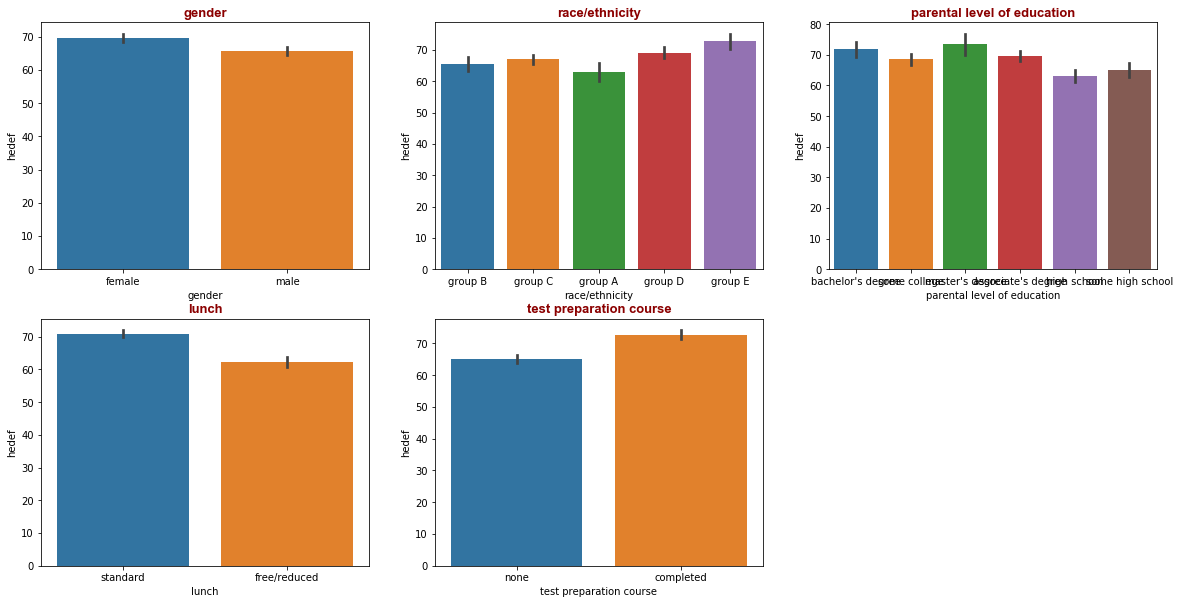

In [18]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.barplot(df["gender"], df["hedef"])
plt.title("gender", fontdict = baslik_font)

plt.subplot(2,3,2)
sns.barplot(df["race/ethnicity"], df["hedef"])
plt.title("race/ethnicity", fontdict = baslik_font)

plt.subplot(2,3,3)
sns.barplot(df["parental level of education"], df["hedef"])
plt.title("parental level of education", fontdict = baslik_font)

plt.subplot(2,3,4)
sns.barplot(df["lunch"], df["hedef"])
plt.title("lunch", fontdict = baslik_font)

plt.subplot(2,3,5)
sns.barplot(df["test preparation course"], df["hedef"])
plt.title("test preparation course", fontdict = baslik_font)


plt.show()




Yeni  oluşturulan 'hedef' değişkenimizin diğer kategorik değişkenlerle ilişkisine grafiklerde baktığımızda değişkenlik görüyoruz 
ama bunların bilimsel açıdan anlamlı olup olmadığına da bakmalıyız.

In [19]:
#cinsiyet ve hedef ilişkisi
male= df[df['gender']=='male']['hedef']
female = df[df['gender']=='female']['hedef']
stats.ttest_ind(male,female)

Ttest_indResult(statistic=-4.169913529142, pvalue=3.311973638243664e-05)

In [20]:
#öğle yemeği ve hedef ilişkisi
standard= df[df['lunch']=='standard']['hedef']
free = df[df['lunch']=='free/reduced']['hedef']
stats.ttest_ind(standard,free)

Ttest_indResult(statistic=9.575113051511476, pvalue=7.736791812495384e-21)

In [21]:
#hazırlık kursunu bitirpi bitirmeme ve hedef ilişkisi
completed= df[df['test preparation course']=='completed']['hedef']
none = df[df['test preparation course']=='none']['hedef']
stats.ttest_ind(completed,none)

Ttest_indResult(statistic=8.390944443482592, pvalue=1.633780203592351e-16)

In [ ]:
#Parental level of education ve ethnicity de ikiden fazla grup olduğundan bazı kombinasyonlarına baktım.Tam hali yapılmalı.
#Bütüne bakılnca da bu kategorik değişkenler bu şekilde tek tek değil yine bir döngü vb aracılığıyla yapılmalı.

In [22]:
group_A= df[df['race/ethnicity']=='group A']['hedef']
group_B = df[df['race/ethnicity']=='group B']['hedef']
stats.ttest_ind(group_A,group_B)

Ttest_indResult(statistic=-1.3165043669633527, pvalue=0.18909305895094428)

In [23]:
group_C= df[df['race/ethnicity']=='group C']['hedef']
group_D = df[df['race/ethnicity']=='group D']['hedef']
stats.ttest_ind(group_C,group_D)

Ttest_indResult(statistic=-1.8063576953600955, pvalue=0.07138158673813609)